# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [3]:
cities

['cidreira',
 'san quintin',
 'kapaa',
 'menzelinsk',
 'rikitea',
 'mahebourg',
 'kedrovyy',
 'atuona',
 'saskylakh',
 'barrow',
 'fallon',
 'bengkulu',
 'sitka',
 'vaini',
 'hobart',
 'yellowknife',
 'flinders',
 'taolanaro',
 'provideniya',
 'ushuaia',
 'dehui',
 'broome',
 'saint-philippe',
 'tuktoyaktuk',
 'faanui',
 'tuatapere',
 'victoria',
 'opuwo',
 'sentyabrskiy',
 'ostersund',
 'bluff',
 'fayaoue',
 'tynda',
 'dunedin',
 'emmett',
 'lincoln',
 'poum',
 'puerto ayora',
 'bredasdorp',
 'linjiang',
 'jamestown',
 'belushya guba',
 'ahuimanu',
 'bushehr',
 'busselton',
 'port alfred',
 'beringovskiy',
 'qaanaaq',
 'amderma',
 'new norfolk',
 'kahului',
 'bethel',
 'tarsus',
 'hilo',
 'xinxiang',
 'mutsamudu',
 'nome',
 'ilulissat',
 'upernavik',
 'punta arenas',
 'georgetown',
 'ponta do sol',
 'lebu',
 'cape town',
 'kulhudhuffushi',
 'torbay',
 'solsvik',
 'cruz alta',
 'hithadhoo',
 'verkhoyansk',
 'kariba',
 'novosheshminsk',
 'lovozero',
 'butaritari',
 'dikson',
 'saint ant

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# an API call is made up of a couple of things
# 1.) base url -> location, everything after the base url -> 'order' configuration
# 2.) send the order
# 3.) do something with the returned object

# 1.) URL
# parts:            location        |      configuration...                  password                    specifics
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=kawalu"

# send the order
kawalu_data = requests.get(url).json()

# process the order -> City	Cloudiness	Country	Date	Humidity	Lat	Lng	Max Temp	Wind Speed
compact_data = {
    'City': kawalu_data['name'],
    'Cloudiness': kawalu_data['clouds']['all'],
    'Country': kawalu_data['sys']['country'],
    'Date': kawalu_data['dt'],
    'Humidity': kawalu_data['main']['humidity'],
    'Lat': kawalu_data['coord']['lat'],
    'Lng': kawalu_data['coord']['lon'],
    'Max Temp': kawalu_data['main']['temp_max'],
    'Wind Speed': kawalu_data['wind']['speed']
}

compact_data

{'City': 'Kawalu',
 'Cloudiness': 44,
 'Country': 'ID',
 'Date': 1562962771,
 'Humidity': 96,
 'Lat': -7.38,
 'Lng': 108.21,
 'Max Temp': 64.64,
 'Wind Speed': 2.68}

In [ ]:
# The things we need:
# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude

In [5]:
test_req = requests.get("http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ad77a28e519eb987f6fea5444af81b47&q=barentsburg")
test_req.json()

{'cod': '404', 'message': 'city not found'}

In [4]:
# Compiled list of city weather data dictionaries
compiled_list = []

# For loop through list of city names, and create a compact dictionary for each api call result

for city in cities:
    print('Creating api call for city:', city)
    # sample: city = vaini
    
    # 1.) base url -> location, everything after the base url -> 'order' configuration
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city

    # 2.) send the order
    request_data = requests.get(url)
    
    # check to see if order is good or not 
    if request_data.status_code == 404:
        print('No data found for city:', city)
    else:
        compiled_data = request_data.json()
        # 3.) do something with the returned object
        compact_data = {
            'City': compiled_data['name'],
            'Cloudiness': compiled_data['clouds']['all'],
            'Country': compiled_data['sys']['country'],
            'Date': compiled_data['dt'],
            'Humidity': compiled_data['main']['humidity'],
            'Lat': compiled_data['coord']['lat'],
            'Lng': compiled_data['coord']['lon'],
            'Max Temp': compiled_data['main']['temp_max'],
            'Wind Speed': compiled_data['wind']['speed']
        }

        # 4.) Add data to list
        compiled_list.append(compact_data)


Creating api call for city: cidreira
Creating api call for city: san quintin
Creating api call for city: kapaa
Creating api call for city: menzelinsk
Creating api call for city: rikitea
Creating api call for city: mahebourg
Creating api call for city: kedrovyy
Creating api call for city: atuona
Creating api call for city: saskylakh
Creating api call for city: barrow
Creating api call for city: fallon
Creating api call for city: bengkulu
No data found for city: bengkulu
Creating api call for city: sitka
Creating api call for city: vaini
Creating api call for city: hobart
Creating api call for city: yellowknife
Creating api call for city: flinders
Creating api call for city: taolanaro
No data found for city: taolanaro
Creating api call for city: provideniya
Creating api call for city: ushuaia
Creating api call for city: dehui
Creating api call for city: broome
Creating api call for city: saint-philippe
Creating api call for city: tuktoyaktuk
Creating api call for city: faanui
Creating ap

Creating api call for city: te anau
Creating api call for city: cockburn town
Creating api call for city: saint george
Creating api call for city: launceston
Creating api call for city: kiama
Creating api call for city: atikokan
Creating api call for city: lavrentiya
Creating api call for city: blumberg
Creating api call for city: sobolevo
Creating api call for city: dzhebariki-khaya
Creating api call for city: college
Creating api call for city: nishihara
Creating api call for city: narsaq
Creating api call for city: barawe
No data found for city: barawe
Creating api call for city: port hardy
Creating api call for city: nuuk
Creating api call for city: kyren
Creating api call for city: katsuura
Creating api call for city: umm kaddadah
Creating api call for city: hobyo
Creating api call for city: lompoc
Creating api call for city: wilkie
Creating api call for city: saint-augustin
Creating api call for city: sulayman
Creating api call for city: phuthaditjhaba
Creating api call for city:

Creating api call for city: ust-maya
Creating api call for city: pacific grove
Creating api call for city: denpasar
Creating api call for city: caraquet
Creating api call for city: northam
Creating api call for city: bairiki
No data found for city: bairiki
Creating api call for city: abengourou
Creating api call for city: nhulunbuy
Creating api call for city: anzio
Creating api call for city: vila franca do campo
Creating api call for city: kaitangata
Creating api call for city: mabaruma
Creating api call for city: nouakchott
Creating api call for city: kudahuvadhoo
Creating api call for city: coquimbo
Creating api call for city: asfi
No data found for city: asfi
Creating api call for city: bella union
Creating api call for city: dumas
Creating api call for city: verkhniy avzyan
Creating api call for city: namatanai
Creating api call for city: dinsor
No data found for city: dinsor
Creating api call for city: makung
No data found for city: makung
Creating api call for city: progreso
Cre

Creating api call for city: chipata
Creating api call for city: pavlodar
Creating api call for city: mao
Creating api call for city: warqla
No data found for city: warqla
Creating api call for city: tabuk
Creating api call for city: gizo
Creating api call for city: moroleon
Creating api call for city: tazovskiy
Creating api call for city: kyotera
Creating api call for city: manjacaze
Creating api call for city: san
Creating api call for city: linxia
Creating api call for city: cairns


In [5]:
# look at result list
compiled_list

[{'City': 'Cidreira',
  'Cloudiness': 100,
  'Country': 'BR',
  'Date': 1562984245,
  'Humidity': 90,
  'Lat': -30.17,
  'Lng': -50.22,
  'Max Temp': 63.62,
  'Wind Speed': 4.92},
 {'City': 'San Quintin',
  'Cloudiness': 0,
  'Country': 'PH',
  'Date': 1562984245,
  'Humidity': 65,
  'Lat': 17.54,
  'Lng': 120.52,
  'Max Temp': 86.84,
  'Wind Speed': 6.8},
 {'City': 'Kapaa',
  'Cloudiness': 75,
  'Country': 'US',
  'Date': 1562984245,
  'Humidity': 66,
  'Lat': 22.08,
  'Lng': -159.32,
  'Max Temp': 87.8,
  'Wind Speed': 13.87},
 {'City': 'Menzelinsk',
  'Cloudiness': 90,
  'Country': 'RU',
  'Date': 1562984245,
  'Humidity': 93,
  'Lat': 55.73,
  'Lng': 53.11,
  'Max Temp': 59,
  'Wind Speed': 17.9},
 {'City': 'Rikitea',
  'Cloudiness': 62,
  'Country': 'PF',
  'Date': 1562984245,
  'Humidity': 78,
  'Lat': -23.12,
  'Lng': -134.97,
  'Max Temp': 74.42,
  'Wind Speed': 14.14},
 {'City': 'Mahebourg',
  'Cloudiness': 20,
  'Country': 'MU',
  'Date': 1562984246,
  'Humidity': 77,
  'Lat'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# turn to dataframe
city_weather_df = pd.DataFrame(compiled_list)
city_weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cidreira,100,BR,1562984245,90,-30.17,-50.22,63.62,4.92
1,San Quintin,0,PH,1562984245,65,17.54,120.52,86.84,6.80
2,Kapaa,75,US,1562984245,66,22.08,-159.32,87.80,13.87
3,Menzelinsk,90,RU,1562984245,93,55.73,53.11,59.00,17.90
4,Rikitea,62,PF,1562984245,78,-23.12,-134.97,74.42,14.14
5,Mahebourg,20,MU,1562984246,77,-20.41,57.70,64.99,4.70
6,Kedrovyy,0,RU,1562984246,67,56.17,91.82,62.60,2.24
7,Atuona,93,PF,1562984246,75,-9.80,-139.03,80.36,17.18
8,Saskylakh,100,RU,1562984246,57,71.97,114.09,55.88,7.83
9,Barrow,0,AR,1562984246,77,-38.31,-60.23,42.20,4.92


In [8]:
#print DF to CSV
city_weather_df.to_csv('CW.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

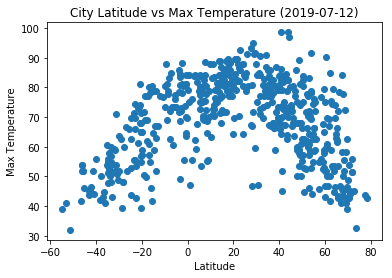

In [18]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Max Temp"])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.savefig("LatVsTemp.png")
plt.show()



#### Latitude vs. Humidity Plot

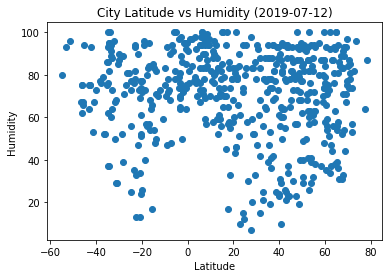

In [19]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Humidity"])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.savefig("LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

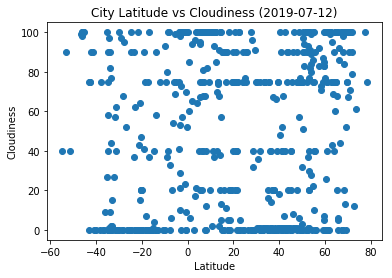

In [20]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')
plt.savefig("LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

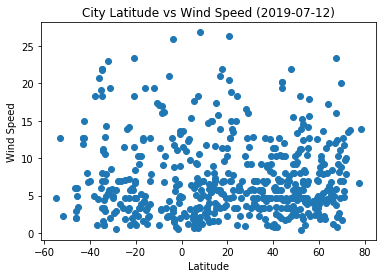

In [22]:
plt.scatter(city_weather_df["Lat"],city_weather_df["Wind Speed"])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.savefig("LatVsWindSpeed.png")
plt.show()